In [25]:
#define model
import functools
import math

def oscillation(t, vec):
    x, y, dx, dy = vec[0], vec[1], vec[2], vec[3]
    nu = 0.012277471
    d_1 = ((x + nu)**2 + y**2)**(3/2) 
    d_2 = ((x - (1 - nu))**2 + y**2)**(3/2)
    ddx = x+2*dy-(1-nu)*(x+nu)/d_1-nu*(x-(1-nu))/d_2
    ddy = y-2*dx-(1-nu)*y/d_1-nu*y/d_2 
    return np.array([dx, dy, ddx, ddy])

In [26]:
#computational method - ЯМРК(4)
import numpy as np

def rungekut(func, t_0, x_0, t_1):
    h = t_1 - t_0
    x_cur = x_0
    
    k_1 = func(t_0, x_cur)
    k_2 = func(t_0 + h/2, x_cur + k_1 * h/2)
    k_3 = func(t_0 + h/2, x_cur + h/2 * k_2)
    k_4 = func(t_0 + h,   x_cur + h   * k_3)
    
    x_cur = x_cur + h/6 * (k_1 + 2*k_2 + 2*k_3 + k_4)

    return x_cur

In [33]:
#visualize

from matplotlib import pylab as plt
import math

def create_frame_oscillation(t, x):
    plt.xlim([-1.5, 1.5])
    plt.ylim([-1.5, 1.5])
    plt.plot(x[0], x[1], 'ob', ms=1)
    plt.title('t = {time:.2f} c'.format(time=t))
    plt.xlabel('x')
    plt.ylabel('y')
    #plt.savefig('frames/f_{:04.0f}.png'.format(t * 100), bbox_inches='tight', dpi=240)

In [43]:
import os

def create_visual(comp_method_func, model_func, create_frame_func):
    if not os.path.exists('frames'):
        os.makedirs('frames')
    os.system('rm frames/*')

    t_0 = 0
    t_1 = 17.0652165601579625588917206249
    x_0 = [0.994, 0, 0, -2.00158510637908252240537862224]
    step_num = 10000
    time_step = (t_1 - t_0) / step_num    
    t = t_0
    x = x_0
    create_frame_func(t, x)
    for i in range(step_num):
        x = comp_method_func(model_func, t, x, t + time_step)
        t = t + time_step
        create_frame_func(t, x)

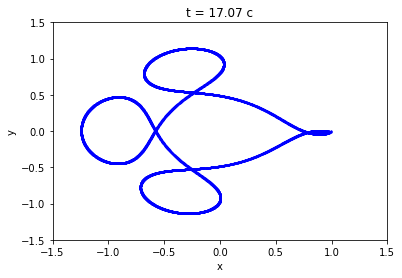

In [44]:
create_visual(comp_method_func=rungekut, model_func=oscillation, create_frame_func=create_frame_oscillation)

In [40]:
# use of library runge kutta method
import scipy
from scipy import integrate

#create_visual(comp_method_func=integrate.RK45, model_func=oscillation_for_lib_rk, create_frame_func=create_frame_lib_rk)

In [ ]:
integrate.RK45()